In [1]:
DEMONSTRATIVE = False

In [2]:
from config import *
from src.word2vec import Word2Vec
from src.preprocess import load_raw_data, filter_data
from src.knnClassifier import *
from src.clusterReport import *
from src.callbacks import *
from src.utils import *
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import fastplot
import seaborn as sns
from cycler import cycler
from src.knnGraph import *

cc = (cycler('color',['k', 'r', 'b', 'g', 'y', 'm', 'c'])+
      cycler('linestyle',['-', '--', '-.', ':', '-', '--', '-.']))

In [4]:
tsne_df = pd.read_csv(f'{DATASETS}/tsne.csv').drop(columns=['Unnamed: 0'])

In [5]:
raw_data = load_raw_data('20210331')
daily = filter_data(raw_data, '20210331')

In [6]:
# Load the ground truth
gt = pd.read_csv(MANUAL_GT)
ips = daily.ip.unique()
# Get the lookup dataframe to retrieve
# the ground truth class of the last day senders
lookup = pd.DataFrame(ips, columns=['ip'])\
           .merge(gt, on='ip', how='left')\
           .fillna('unknown').replace({ 'criminalip':'unknown', 
                'adscore':'unknown', 'quadmetrics':'unknown', 
                'esrg_stanford':'unknown', 'netscout':'unknown'})
lookup = lookup.rename(columns={'gt':'class'})
print(lookup.shape)
lookup.head(3)

(22399, 2)


,ip,class
0,201.166.132.114,unknown
1,172.245.10.231,unknown
2,119.237.180.88,unknown


In [7]:
# Load the ground truth
gt2 = pd.read_csv(GT).drop(columns=['Unnamed: 0'])
ips = daily.ip.unique()
# Get the lookup dataframe to retrieve
# the ground truth class of the last day senders
lookup2 = pd.DataFrame(ips, columns=['ip'])\
           .merge(gt2, on='ip', how='left')\
           .fillna('unknown').replace({ 'criminalip':'unknown', 
                'adscore':'unknown', 'quadmetrics':'unknown', 
                'esrg_stanford':'unknown', 'netscout':'unknown'})
# Manage Internet-census <- Bitsight
to_replace_ips = lookup2[lookup2['class']=='internet-census'].ip
idx = lookup[lookup.ip.isin(to_replace_ips)].index
lookup.loc[idx, 'class'] = 'internet-census'
lookup = lookup.replace({'bitsight':'internet-census'})

print(lookup2.shape)
lookup2.head(3)

(22399, 2)


,ip,class
0,201.166.132.114,unknown
1,172.245.10.231,unknown
2,119.237.180.88,unknown


In [22]:
sh_df = pd.read_csv(f'{DATASETS}/clusters.csv')
sh_df['sub24'] = sh_df.ip.apply(get_subnet24)
sh_df['sub16'] = sh_df.ip.apply(get_subnet16)
sh_df = sh_df.merge(lookup, on='ip', how='left')
sh_df.head(3)

,ip,sh,C,sub24,sub16,class
0,201.166.132.114,0.068506,0,201.166.132.0,201.166.0.0,unknown
1,200.233.231.247,-0.051675,0,200.233.231.0,200.233.0.0,unknown
2,187.140.96.106,0.175735,0,187.140.96.0,187.140.0.0,unknown


In [24]:
if not DEMONSTRATIVE: raw_data = load_raw_data('202103')
else: raw_data = load_raw_data('2021033*')
filtered = filter_data(raw_data, '20210331')

In [10]:
if not DEMONSTRATIVE:
    generate_report(sh_df, filtered, daily, tsne_df, 'cluster_report')
else:
    generate_report(sh_df, filtered, daily, tsne_df, 'demonstrative')

<Figure size 640x480 with 0 Axes>

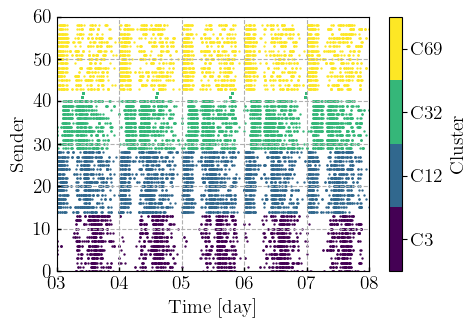

In [112]:
cl_traffic = extract_shadowserver_pattern(filtered, sh_df)
cmap = plt.cm.viridis(np.linspace(0, 1, cl_traffic.C.unique().shape[0]))
    
%matplotlib inline
plot = fastplot.plot(None,  None, mode = 'callback', callback = lambda plt: clusterShadowserverPatternFinal(plt, cl_traffic),
                          figsize=(5, 3.5), fontsize=14, style='latex', cycler=cycler('color', cmap))
if not DEMONSTRATIVE:
    plot.savefig(f'reports/figures/shadowserver_pattern.png')
plot.show()

<Figure size 640x480 with 0 Axes>

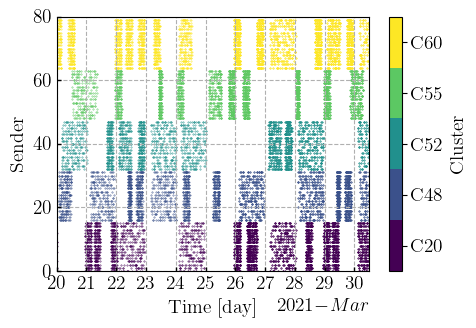

In [116]:
cl_traffic = extract_censys_pattern(filtered, sh_df)
cmap = plt.cm.viridis(np.linspace(0, 1, cl_traffic.C.unique().shape[0]))
    
%matplotlib inline
plot = fastplot.plot(None,  None, mode = 'callback', callback = lambda plt: clusterCensysPatternFinal(plt, cl_traffic),
                          figsize=(5, 3.5), fontsize=14, style='latex', cycler=cycler('color', cmap))
if not DEMONSTRATIVE:
    plot.savefig(f'reports/figures/censys_pattern.png')
plot.show()

<Figure size 640x480 with 0 Axes>

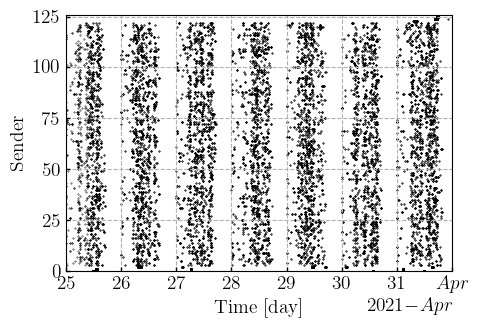

In [48]:
cl_traffic = filtered[filtered.ip.isin(sh_df[sh_df.C == 67].ip)]
cl_traffic = cl_traffic.merge(sh_df[['ip', 'C']], on='ip', how='left').sort_values(['C', 'ts'])

ptoken = {v:k for k,v in enumerate(cl_traffic.pp.unique())}
cl_traffic['ptoken'] = cl_traffic.pp.apply(lambda x: ptoken[x])
iptoken = {v:k for k,v in enumerate(cl_traffic.ip.unique())}
cl_traffic['iptoken'] = cl_traffic.ip.apply(lambda x: iptoken[x])

cl_traffic.index = pd.DatetimeIndex(cl_traffic.ts)
cmap = plt.cm.magma(np.linspace(0, 1, cl_traffic.pp.unique().shape[0]+1))
 
%matplotlib inline
plot = fastplot.plot(None,  None, mode = 'callback', callback = lambda plt: clusterActivityPatternFinal(plt, cl_traffic),
                          figsize=(5, 3.5), fontsize=14, style='latex', cycler=cycler('color', cmap))
if not DEMONSTRATIVE:
    plot.savefig(f'reports/figures/hurricaneElectric_pattern.png')
plot.show()

<Figure size 640x480 with 0 Axes>

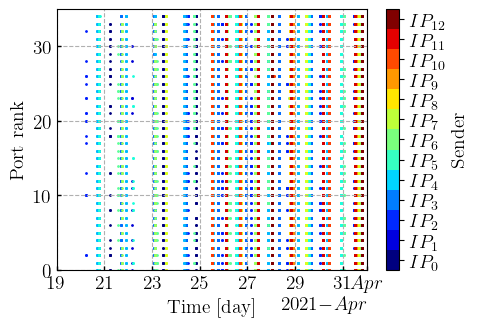

In [49]:
cl_traffic = filtered[filtered.ip.isin(sh_df[sh_df.C == 30].ip)]
cl_traffic = cl_traffic.merge(sh_df[['ip', 'C']], on='ip', how='left').sort_values(['C', 'ts'])

ptoken = {v:k for k,v in enumerate(cl_traffic.pp.unique())}
cl_traffic['ptoken'] = cl_traffic.pp.apply(lambda x: ptoken[x])
iptoken = {v:k for k,v in enumerate(cl_traffic.ip.unique())}
cl_traffic['iptoken'] = cl_traffic.ip.apply(lambda x: iptoken[x])

cl_traffic.index = pd.DatetimeIndex(cl_traffic.ts)

cmap = plt.cm.jet(np.linspace(0, 1, cl_traffic.ip.unique().shape[0]))

%matplotlib inline
plot = fastplot.plot(None,  None, mode = 'callback', callback = lambda plt: clusterPortPatternFinal(plt, cl_traffic),
                          figsize=(5, 3.5), fontsize=14, style='latex', cycler=cycler('color', cmap))
if not DEMONSTRATIVE:
    plot.savefig(f'reports/figures/cluster30_pattern.png')
plot.show()